In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple

from decision_mining.core import fuzzy

In [6]:
"""Modified function with all gainratios"""
from INNO.core.c45 import gain_ratio

def find_threshold(attribute: np.ndarray, target: np.ndarray) -> Tuple[float, float]:
    """Threshold function as defined in "Improved Use of Continuous Attributes in C4.5" by R. Quinlan.

    Args:
        attribute (np.ndarray): Attribute or column of `X` in training data, continuous values
        target (np.ndarray): Target or `y` in training data

    Returns:
        Tuple[float, float]: threshold, gainratio of threshold
    """
    attr_c = np.sort(attribute)  # Sorted copy of attribute
    thresholds = (attr_c[1:] + attr_c[:-1]) / 2  # All possible thresholds
    best_t = 0.  # Threshold with greatest gain ratio
    # Greatest gain ratio (gain ratio at threshold best_t)
    gain_ratios_list = []
    best_gain_ratio = 0.
    for t in thresholds:
        attr_t = attribute < t
        gain_ratio_at_t = gain_ratio(attr_t, target)
        gain_ratios_list.append(gain_ratio_at_t)
        if gain_ratio_at_t > best_gain_ratio:
            best_gain_ratio = gain_ratio_at_t
            best_t = t

    return best_t, best_gain_ratio, gain_ratios_list

In [7]:
np.random.seed(10)
cold = np.random.normal(10, 4, 50)
warm = np.random.normal(25, 4, 50)
hot = np.random.normal(35, 4, 50)
hothot = np.random.normal(45, 4, 50)
X = np.concatenate((cold, warm, hot, hothot))
y = np.array([*["cold"] * 50,
                *["warm"] * 50,
                *["hot"] * 50,
                *["hothot"] * 50])

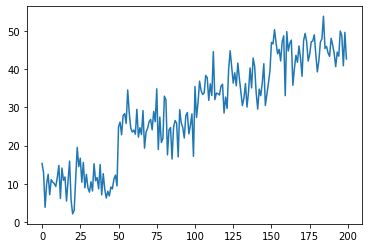

In [8]:
plt.plot(X)

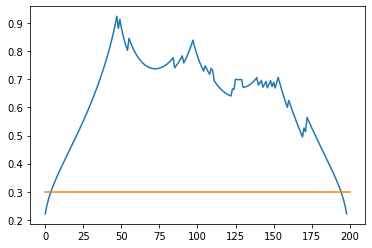

16.205649786709955

In [9]:
best_t, gain_ratio_t, gain_ratios = find_threshold(X, y)
plt.plot(gain_ratios)
plt.plot([0,200], [0.3,0.3])
plt.plot
plt.show()
best_t

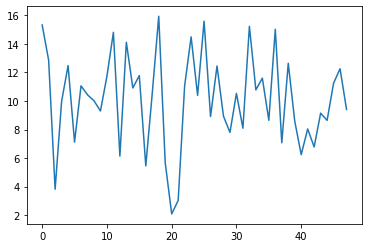

In [10]:
plt.plot(X[X < best_t])

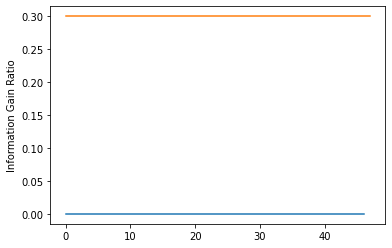

0.0

In [11]:
threshold, _, gain_ratios = find_threshold(X[X < best_t], y[X < best_t])
plt.plot(gain_ratios)
plt.plot([0,len(gain_ratios)], [0.3,0.3])
plt.ylabel("Information Gain Ratio")
# plt.xticks(np.arange(min(X[X < best_t]), max(X), 10))
plt.show()
threshold

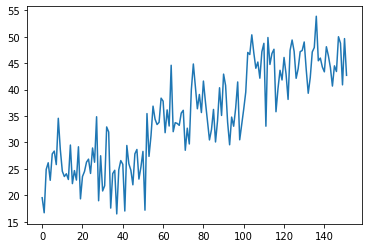

In [12]:
plt.plot(X[X > best_t])

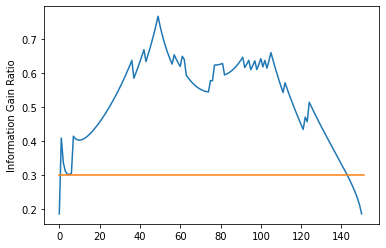

29.538949160007757

In [13]:
threshold, _, gain_ratios = find_threshold(X[X > best_t], y[X > best_t])
plt.plot(gain_ratios)
plt.plot([0,len(gain_ratios)], [0.3,0.3])
plt.ylabel("Information Gain Ratio")
plt.show()
threshold

In [14]:
thresholds = fuzzy.get_all_thresholds(X, y, 0.4)
thresholds

[16.205649786709955, 29.538949160007757, 41.73065170702169]

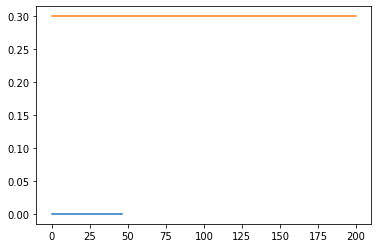

In [15]:
best_t, gain_ratio_t, gain_ratios = find_threshold(X[X<16], y[X<16])

plt.plot(gain_ratios)
plt.plot([0,200], [0.3,0.3])
plt.plot
plt.show()

In [16]:
find_threshold(X[X<16], y[X<16])

(0.0,
 0.0,
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [17]:
thresholds = fuzzy.extend_thresholds(X, thresholds)
thresholds

[(15.326346016518073, 17.02242492103577),
 (29.184731427233057, 30.096656077047783),
 (40.91075723089042, 42.17171421173134)]

In [18]:
fuzzy.fuzzify_value(20, thresholds)

array([0., 1., 0., 0.])

In [19]:
fuzzy.fuzzify_value(41, thresholds)

array([0.        , 0.        , 0.92922616, 0.07077384])

In [20]:
fuzzy_values = np.stack([fuzzy.fuzzify_value(val, thresholds) for val in X], axis=0)
fuzzy_values

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        ,

In [21]:
df = pd.DataFrame(fuzzy_values, columns=[f"fuzzy_{i}" for i in range(fuzzy_values.shape[1])])
df["X"] = X
df["y"] = y
columns = df.columns.tolist()
columns = columns[-2:] + columns[:-2]
df = df[columns]
df.sort_values(["X"],inplace=True)
df.iloc[95:105]

,X,y,fuzzy_0,fuzzy_1,fuzzy_2,fuzzy_3
66,29.184731,warm,0.0,1.000000,0.000000,0.0
90,29.430833,warm,0.0,0.730130,0.269870,0.0
62,29.515141,warm,0.0,0.637679,0.362321,0.0
141,29.562758,hot,0.0,0.585463,0.414537,0.0
121,29.718210,hot,0.0,0.414997,0.585003,0.0
134,30.096656,hot,0.0,0.000000,1.000000,0.0
131,30.481795,hot,0.0,0.000000,1.000000,0.0
146,30.507584,hot,0.0,0.000000,1.000000,0.0
102,31.308363,hot,0.0,0.000000,1.000000,0.0
109,31.850924,hot,0.0,0.000000,1.000000,0.0
